In [1]:
cd B:\JUPYTER NOTEBOOK

B:\JUPYTER NOTEBOOK


In [2]:
open('names.txt', 'r').read().splitlines()

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
len(words)

32033

In [6]:
min(len(w) for w in words)

2

In [7]:
max(len(w) for w in words)

15

In [8]:
import torch

In [9]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [11]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [12]:
sorted(b.items(), key = lambda kv: -kv[1])

[]

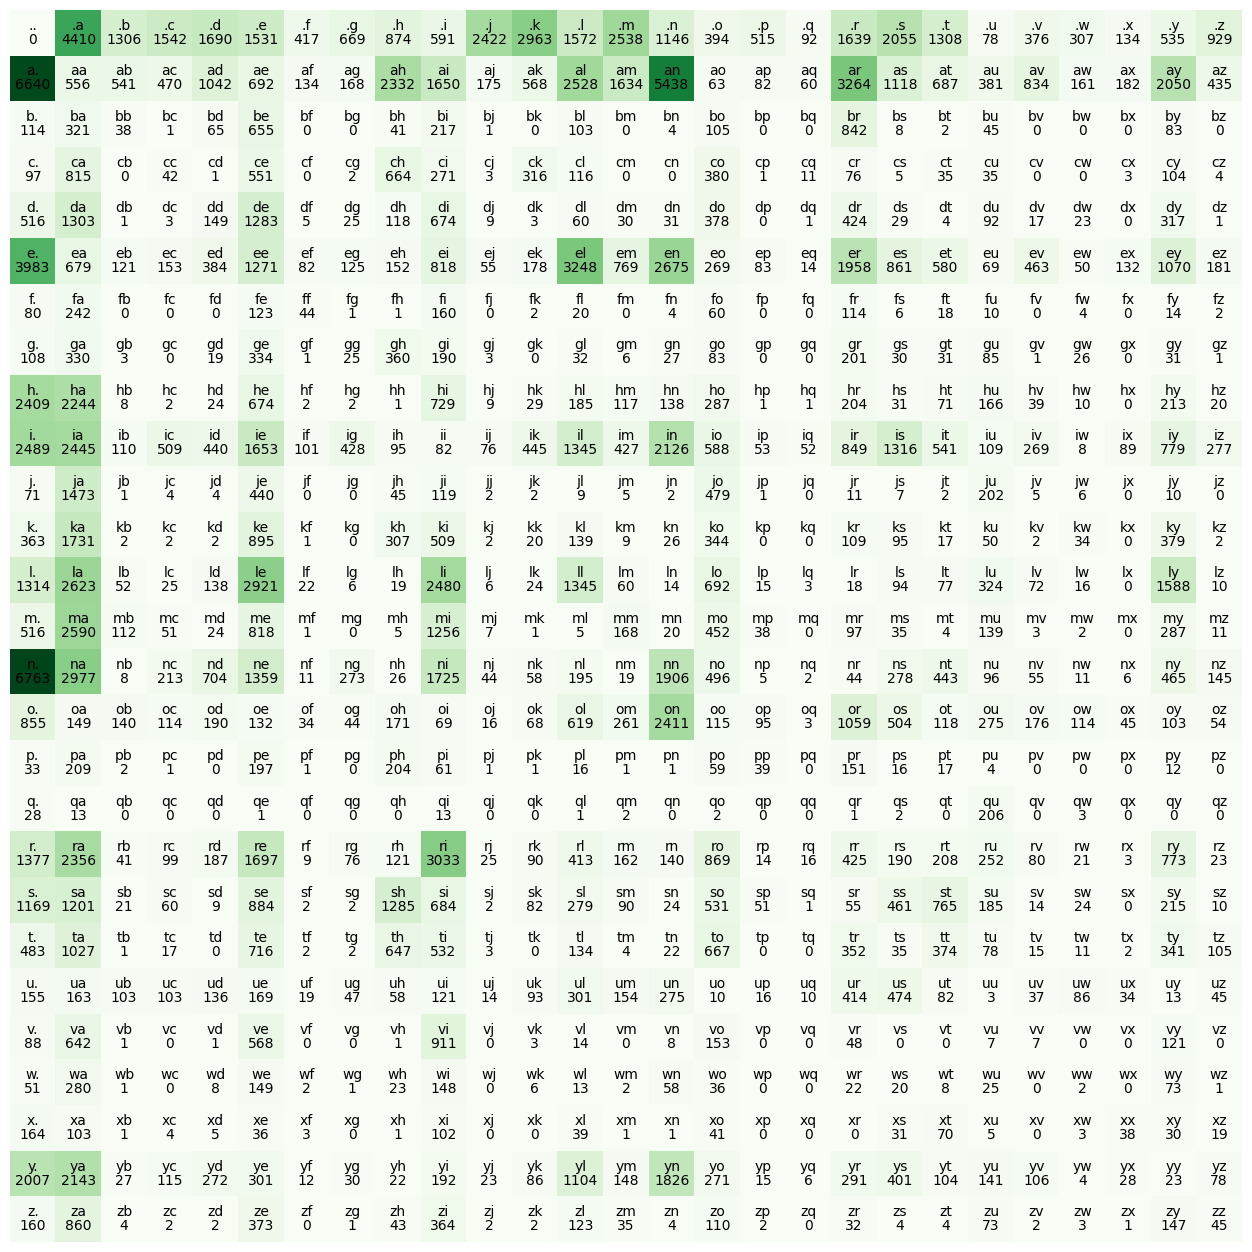

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Greens')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="black")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="black")
plt.axis('off');
#Everything in this chart is being doubled, the correct numbers should all be divided by two, not sure why this is happening 11/6/2022
#I think this has since been fixed and these are the correct values 12/14/2022

In [14]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [15]:
p = N[0].float()
p = p / p.sum()

In [16]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

In [17]:
p = torch.rand(3, generator=g)
p = p / p.sum()

In [18]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [19]:
P = (N+1).float() #Adding 1, or any number to N here adds padding to the model. This is adding a 1 count to every bigram, effectively getting rid of any 0 count in our probability matrix P.
P /= P.sum(1, keepdims=True)
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [23]:
#g = torch.Generator().manual_seed(2147483647) THIS IS THE ORIGINAL SEEND
g = torch.Generator().manual_seed(4147483647)

for i in range(20):
    
    out = []
    ix = 0
    while True:
        
        p = P[ix]
        #p = N[ix].float() # This is the model being tranined on Bigrams Line 1 - much more efficient than torch.ones
        #p = p / p.sum() # This is the model being tranined on Bigrams Line 2
        #p = torch.ones(27) / 27 # This is the model treating all letters as equals, and not based on their probability from the Bigram plot
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

jah.
conga.
aletwa.
ja.
rinberi.
anzazeysha.
owige.
dansennisa.
fa.
jantza.
me.
tiou.
gh.
jordovememademan.
joree.
dh.
ac.
satalisandylaceziy.
kury.
ob.


In [24]:
ix

0

In [25]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n +=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        
print(f'{log_likelihood=}')
nll = -log_likelihood #negative log liklihood: having 0 for the loss function is good. the higher this number the worse
print(f'{nll=}')
print(f'{nll/n}') # using n as a count, this normalizes the loss function (an average). this is essentially the wuality of the function, the lower the better
# we would like to find the parameters to minimize the nll

# GOAL: maximize liklihood of the data w.r.t model parameters (statistical modeling). Our model parameters are define as the probabilities listed on the table
# equivalent to maximizing the log liklihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

.e: 0.0478 -3.0410
em: 0.0377 -3.2793
mm: 0.0253 -3.6753
ma: 0.3885 -0.9454
a.: 0.1958 -1.6305
.o: 0.0123 -4.3965
ol: 0.0779 -2.5526
li: 0.1774 -1.7293
iv: 0.0152 -4.1845
vi: 0.3508 -1.0476
ia: 0.1380 -1.9807
a.: 0.1958 -1.6305
.a: 0.1376 -1.9835
av: 0.0246 -3.7041
va: 0.2473 -1.3971
a.: 0.1958 -1.6305
log_likelihood=tensor(-38.8086)
nll=tensor(38.8086)
2.4255354404449463


In [26]:
log_likelihood = 0.0
n = 0
for w in words:
#for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n +=1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        
print(f'{log_likelihood=}')
nll = -log_likelihood #negative log liklihood: having 0 for the loss function is good. the higher this number the worse
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [27]:
# The code above solves the problem by creating counts of the bigrams, then normalizing those counts.
# Now we will take a different approach, we will end up in a similar situation, but by approaching the problem in a different way. We will cast the problem of bigram level character language modeling
# into a neural network. It receives a single character as an input, then a neural network with some weights (parameters w) and output a probability of what will follow. We can evauluate any setting 
# of the parameters of the network because we have a loss function (negative log likelihood) 

# tune the weights so the neural network is correctly predicted the probabilities of the next character

# create the training set of all the bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
        

. e
e m
m m
m a
a .


In [28]:
xs

tensor([ 0,  5, 13, 13,  1])

In [29]:
ys

tensor([ 5, 13, 13,  1,  0])

In [30]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() # xenc translates to "x encoded"

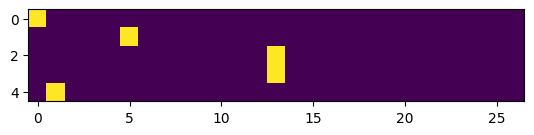

In [31]:
plt.imshow(xenc) # this is encoding the examples (tensors) into vectors

In [32]:
xenc.dtype

torch.float32

In [33]:
# constructing our first neuron

In [34]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # W are the Weights
W
xenc @ W # @ is a matrix multiplication operator in pytorch
# Xenc [the input layer] (5, 27) @ W (27, 27) [the first hidden layer] -> (5, 27)

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [35]:
# this section is the "forward pass" and can be back-propogated from
xenc = F.one_hot(xs, num_classes=27).float() # xenc translates to "x encoded"
logits = xenc @ W # predict log counters
counts = logits.exp() # Counts, equivalent to N
probs = counts / counts.sum(1, keepdims = True) # probabilities for next character. NOTE: these last two lines together are called a "softmax"
loss = -probs[torch.arange(5), ys].log().mean()

In [36]:
print(loss.item())

3.7693049907684326


In [37]:
# backward pass
W.grad = None #set the gradient to zero
loss.backward()

In [38]:
W.data += -0.1 * W.grad

In [39]:
print(loss.item())

3.7693049907684326


In [40]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples:  228146


In [41]:
#gradient descent
for k in range(100):
    
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # xenc translates to "x encoded"
    logits = xenc @ W # predict log counters
    counts = logits.exp() # Counts, equivalent to N
    probs = counts / counts.sum(1, keepdims = True) # probabilities for next character. NOTE: these last two lines together are called a "softmax"
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    
    # backward pass
    W.grad = None # set the gradient to zero
    loss.backward()
    
    # update
    W.data += -50 * W.grad

3.758953332901001
3.371100664138794
3.154043197631836
3.020373582839966
2.927711248397827
2.8604023456573486
2.8097290992736816
2.7701022624969482
2.7380728721618652
2.711496353149414
2.6890029907226562
2.6696884632110596
2.6529300212860107
2.638277292251587
2.6253881454467773
2.613990545272827
2.60386323928833
2.5948216915130615
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562589168548584
2.551633834838867
2.547366142272949
2.543415069580078
2.5397486686706543
2.5363364219665527
2.5331544876098633
2.5301806926727295
2.5273969173431396
2.5247862339019775
2.522334575653076
2.520028829574585
2.517857789993286
2.515810966491699
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.5042612552642822
2.502929210662842
2.5016613006591797
2.5004520416259766
2.4992988109588623
2.498197317123413
2.497144937515259
2.496137857437134
2.495173692703247
2.4942495822906494
2.493363380432129
2.

In [42]:
g = torch.Generator().manual_seed(2147483647)

for i in range(100):
    
    out = []
    ix = 0
    while True:
        
        # FIRST OLD METHOD BEGIN
        # p = P[ix]
        # FIRST OLD METHOD END
        # SECOND OLD METHOD BEGIN
        #p = N[ix].float() # This is the model being tranined on Bigrams Line 1 - much more efficient than torch.ones
        #p = p / p.sum() # This is the model being tranined on Bigrams Line 2
        #p = torch.ones(27) / 27 # This is the model treating all letters as equals, and not based on their probability from the Bigram plot
        # SECOND OLD METHOD END
        #NEW METHOD
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict lof-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        #--------
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axwaninaymoryles.
kondmaisah.
anchshizarie.
odaren.
iaddash.
h.
jionatien.
egwver.
ga.
t.
a.
jayn.
ilemannariaenien.
ad.
f.
akiinela.
trttanakerorudayaaxetona.
lamoyonutonadengin.
torrederahmokallovwiprasskh.
a.
wai.
kn.
jaieendenelfff.
kianu.
eryly.
zeeieil.
kayxtrglynenn.
r.
t.
rja.
kronanuroliojanidames.
dikie.
s.
elarieiavelvalllaish.
eythann.
janianaeri.
boma.
poree.
l.
adhanoena.
naisaryan.
sialaitalyee.
cena.
lisarr.
bizyngor.
eve.
blahish.
tovih.
al.
an.
amulileron.
jar.
ran.
erelezio.
ahistorarieneibrodaiazjimiah.
lssthll.
havanajey.
g.
pfbcere.
gd.
taashderestroumunkrydany.
rrartar.
liala.
leleanaiai.
manni.
aumobi.
i.
k.
mirwceriyiy.
n.
alinaiyn.
mionde.
ma.
rskelier.
men.
o.
br.
vihilun.
lis.
beliofyphiussadrelila.
chi.
e.
dar.
stlaelivinteyast.
an.
hiltamoetlyan.
usorqli.
h.
r.
my.
rykenayl.
kyalileyl.
xja.
keohanannon.
fph.
aya.
le.
kya.
khie.
